# Linear Regression - Real Estate Data Set

> Joseph P. Vantassel, Texas Advanced Computing Center - The University of Texas at Austin

## Install Required Python Packages

For this example you will need several Python packages, you can use the cell below to install them. Be sure to restart your Jupyter kernel once the installation is complete, by going to `Kernel > Restart Kernel and Clear All Outputs ...`. Once your kernel restarts you can continue with the cell below the `Import Required Python Packages` header below.

In [1]:
!pip install -r requirements.txt

## Import Required Python Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model as lm

## Load Data Set

In [3]:
df = pd.read_csv("real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Preparing the Data

### Understanding the Data

We have 6 features:

- Transaction data (decimal years): last date the house sold
- House age (decimal years): years since built
- Distance to nearest MRT station (decimal meters): distance to nearest train station
- Number of Convenience stores (integer)
- Latitude (decimal degrees)
- Longitude (decimal degrees)
    
We have one value we are trying to predict:

- Unit price (decimal currency)

In [4]:
# convert to numpy
xfeatures = df.iloc[:, 1:-1].to_numpy()
xfeatures_labels = list(df.columns)[1:-1]
ypredict = df.iloc[:, -1].to_numpy()

# make sure we did the slices correctly
print(f"Row 0 (features): {xfeatures[0, :]}")
print(f"Row 0 (label): {ypredict[0]}")

Row 0 (features): [2012.917     32.        84.87882   10.        24.98298  121.54024]
Row 0 (label): 37.9


In [5]:
print(f"xfeatures.shape = {xfeatures.shape}")
print(f"ypredict.shape = {ypredict.shape}")

xfeatures.shape = (414, 6)
ypredict.shape = (414,)


In [6]:
np.min(ypredict), np.max(ypredict)

(7.6, 117.5)

### Shuffle & Split

Shuffle the dataset and split into train (70%), validation (15%), and test (15%) sets.

In [7]:
ptrain, pvalid, ptest = 0.7, 0.15, 0.15

# shuffle
rng = np.random.default_rng(1824)
shuffle_idxs = np.arange(len(ypredict))
rng.shuffle(shuffle_idxs)
xfeatures_shuffled = xfeatures[shuffle_idxs]
ypredict_shuffled = ypredict[shuffle_idxs]

# split
start_idx, stop_idx = 0, int(ptrain*len(ypredict))
xfeatures_train, ypredict_train = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_train.shape, ypredict_train.shape)


start_idx, stop_idx = stop_idx, stop_idx+int(pvalid*len(ypredict))
xfeatures_valid, ypredict_valid = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_valid.shape, ypredict_valid.shape)


start_idx, stop_idx = stop_idx, -1
xfeatures_test, ypredict_test = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_test.shape, ypredict_test.shape)

(289, 6) (289,)
(62, 6) (62,)
(62, 6) (62,)


### View the Training Set

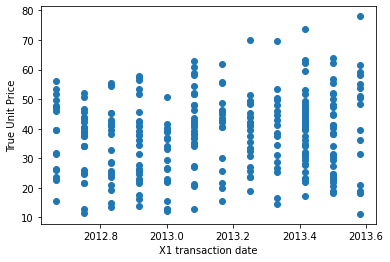

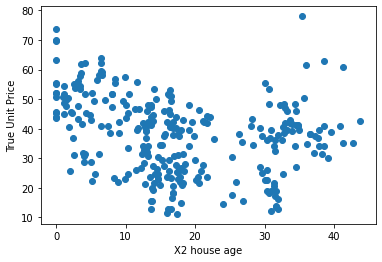

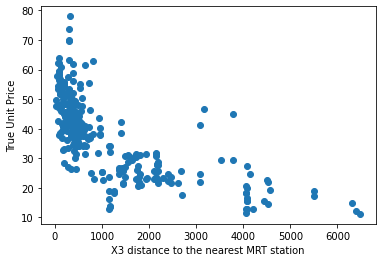

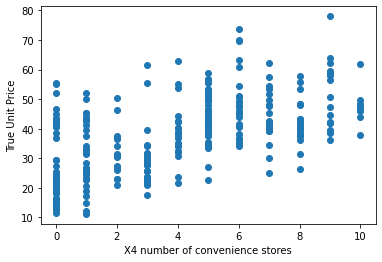

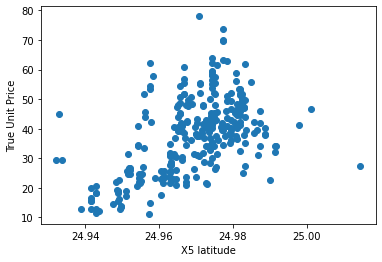

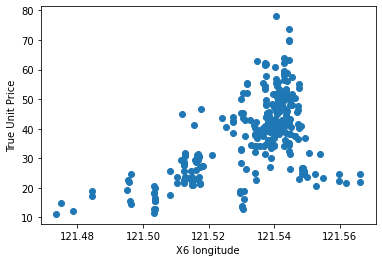

In [8]:
for feature, label in zip(xfeatures_train.T, xfeatures_labels):
    plt.scatter(feature, ypredict_train)
    plt.xlabel(label)
    plt.ylabel("True Unit Price")
    plt.show()

### Normalize Training Set

Scale the training set's features to consist of a series of small values (between approx -3 and 3) with a mean of zero.

_Note this is not strictly necessary for linear regression, but it is necessary for other more complex learning algorithms like ridge regression that we will show later in this example._

In [9]:
xmeans = np.mean(xfeatures_train, axis=0)
print("xmeans", xmeans)
xstds = np.std(xfeatures_train, axis=0, ddof=1)
print("xstds", xstds)

xfeatures_train_normed = (xfeatures_train - xmeans) / xstds
print("min", np.min(xfeatures_train_normed, axis=0))
print("max", np.max(xfeatures_train_normed, axis=0))
print("mean", np.mean(xfeatures_train_normed, axis=0))

xmeans [2013.15370934   17.73875433 1096.77751277    4.11418685   24.96912228
  121.53322848]
xstds [2.81894838e-01 1.14429633e+01 1.29862762e+03 2.96930584e+00
 1.26616573e-02 1.56482131e-02]
min [-1.72656351 -1.55018887 -0.82656079 -1.38557194 -2.92633759 -3.81503479]
max [1.5228752  2.27749097 4.15149302 1.98221856 3.59097669 2.11152048]
mean [-4.42653642e-12 -5.16407371e-16 -2.46630859e-16  4.45625851e-17
 -8.83526239e-14 -5.92967313e-12]


## Create and Train a Linear Model

While we could write our own linear classifier, we will borrow sklearn's instead.

In [10]:
def rmse(yhat, y):
    "Define the Root-Mean-Square Error (RMSE)."
    return np.sqrt(np.mean(np.power(yhat - y, 2)))

In [11]:
# create our model
linmod = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model = linmod.fit(xfeatures_train_normed, ypredict_train)

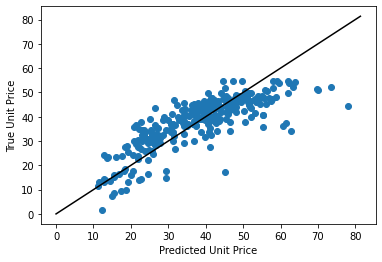

RMSE = 7.75


In [12]:
yhat_train = trained_model.predict(xfeatures_train_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

### Predict on Validation Set

In [13]:
xfeatures_valid_normed = (xfeatures_valid - xmeans) / xstds
yhat_valid = trained_model.predict(xfeatures_valid_normed)

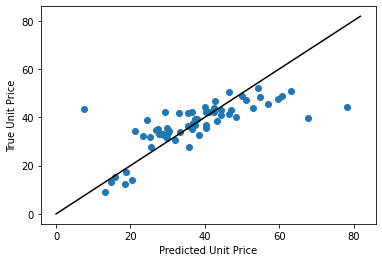

RMSE = 9.41


In [14]:
plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

### Error Analysis

Our error is ~7.8 on the training set and ~9.4 on the validation set, which is not too bad considering the range of the predicted values spans from ~7.6 to ~117.5. Lets look at the residuals to see where our model is not fitting well.

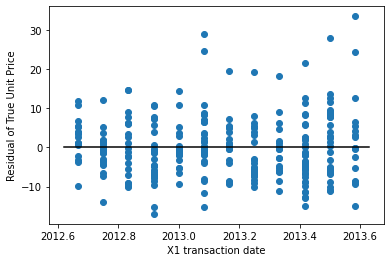

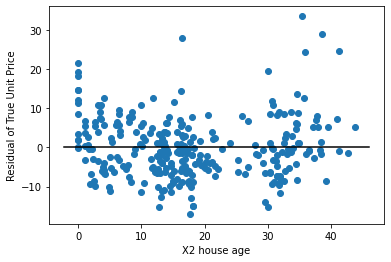

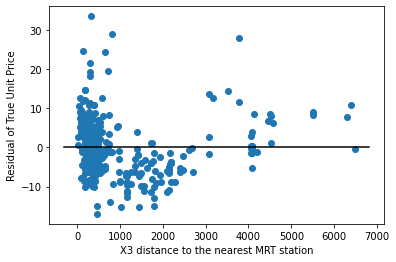

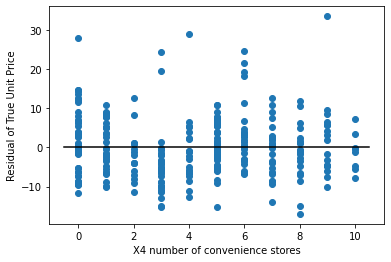

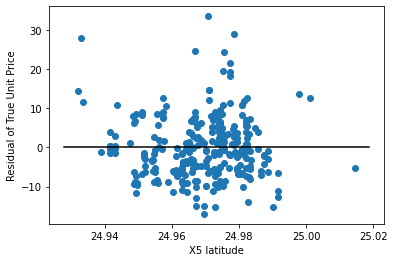

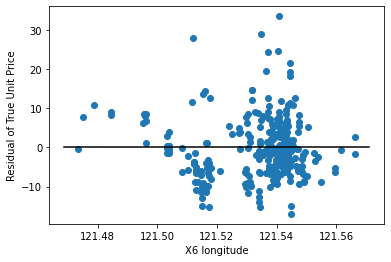

In [15]:
residual = ypredict_train - yhat_train
for label, feature in zip(xfeatures_labels, xfeatures_train.T):
    plt.scatter(feature, residual)
    plt.plot(plt.xlim(), [0,0], color="black")
    plt.xlabel(label)
    plt.ylabel("Residual of True Unit Price")
    plt.show()

## Repeat Training with Quadratic Terms

We see from the error analysis that we are miss predicting some house costs quite substantially. This could be for a number of reasons but one may be that these points are not quite distinguishable based on the linear combination of parameters. To test this we can look at non-linear combinations to potentially find a better (non-linear) representation. To test this hypothesis we will include all of the quadratic terms. These new features that are non-linear combinations of existing features are sometimes referred to as feature crosses.

### Create Training Set

In [16]:
xfeatures_train_quad = []

for start, pfeature in enumerate(xfeatures_train.T):
    for sfeature in xfeatures_train.T[start:]:
        xfeatures_train_quad.append(pfeature * sfeature)

xfeatures_train_quad = np.array(xfeatures_train_quad).T
xfeatures_train_quad = np.hstack((xfeatures_train, xfeatures_train_quad))
print(xfeatures_train_quad.shape)

xfeatures_valid_quad = []
for start, pfeature in enumerate(xfeatures_valid.T):
    for sfeature in xfeatures_valid.T[start:]:
        xfeatures_valid_quad.append(pfeature * sfeature)

xfeatures_valid_quad = np.array(xfeatures_valid_quad).T
xfeatures_valid_quad = np.hstack((xfeatures_valid, xfeatures_valid_quad))
print(xfeatures_valid_quad.shape)

(289, 27)
(62, 27)


### Normalize

In [17]:
xmeans_quad = np.mean(xfeatures_train_quad, axis=0)
xstds_quad = np.std(xfeatures_train_quad, axis=0, ddof=1)
xfeatures_train_quad_normed = (xfeatures_train_quad - xmeans_quad) / xstds_quad
xfeatures_valid_quad_normed = (xfeatures_valid_quad - xmeans_quad) / xstds_quad

### Create and Train

In [18]:
# create our model
linmod_quad = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model_quad = linmod_quad.fit(xfeatures_train_quad_normed, ypredict_train)

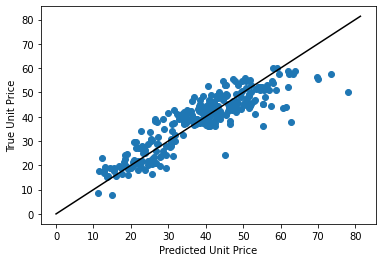

RMSE = 6.04


In [19]:
yhat_train = trained_model_quad.predict(xfeatures_train_quad_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

### Test on Validation Set

In [20]:
xfeatures_valid_quad_normed = (xfeatures_valid_quad - xmeans_quad) / xstds_quad
yhat_valid = trained_model_quad.predict(xfeatures_valid_quad_normed)

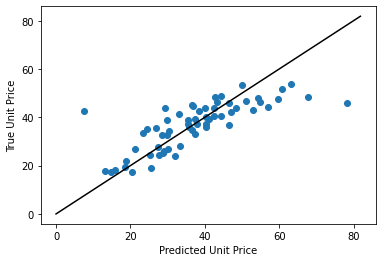

RMSE = 8.78


In [21]:
plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

### Error Analysis

We see a slight increase in the model's performance by including the quadratic terms. The training set loss decreases from 7.8 to 6.0 and the validation loss decreases from 9.4 to 8.8. Whether the added model complexity is justified by the improved performance would need to be decided before accepting the quadratic model as the better of the two. Lets look at one other alternative.

## Repeat Training with Reciprocal Terms

We will now try adding the reciprocal terms.

### Create Training Set

In [22]:
eps = 1E-6
xfeatures_train_recip = np.hstack((xfeatures_train, 1/(xfeatures_train + eps)))
xfeatures_valid_recip = np.hstack((xfeatures_valid, 1/(xfeatures_valid + eps)))

### Normalize

In [23]:
xmeans_recip = np.mean(xfeatures_train_recip, axis=0)
xstds_recip = np.std(xfeatures_train_recip, axis=0, ddof=1)

xfeatures_train_recip_normed = (xfeatures_train_recip - xmeans_recip) / xstds_recip
xfeatures_valid_recip_normed = (xfeatures_valid_recip - xmeans_recip) / xstds_recip

### Fit on Training Data

In [24]:
# create our model
linmod_recip = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model_recip = linmod_recip.fit(xfeatures_train_recip_normed, ypredict_train)

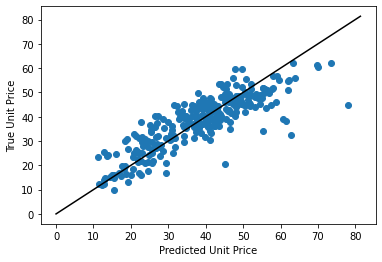

RMSE = 6.90


In [25]:
yhat_train = trained_model_recip.predict(xfeatures_train_recip_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

### Test on Validation Data

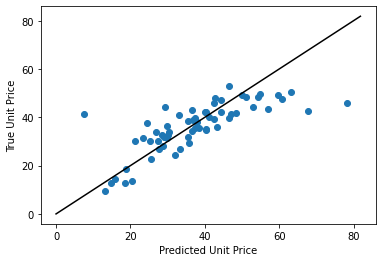

RMSE = 8.99


In [26]:
yhat_valid = trained_model_recip.predict(xfeatures_valid_recip_normed)

plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.xlabel("Predicted Unit Price")
plt.ylabel("True Unit Price")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

### Error Analysis

By adding the recprocal terms we get a better fit (train=6.9, validation=9.0) than from the linear model (train=7.8, validation=9.4) and only slightly worse than the quadratic model (train=6.0, validation=8.8). It could be argued that the reciprocal model with its 12 coefficients (6 linear and 6 reciprocal) is a better model despite its slightly worse performance than the quadratic model with its 27 coefficients (6 linear and 21 quadratic), but we leave such judgements to the reader.
